Данные

Игра содержит особое событие – ивент, для прохождения которого пользователи могут тратить деньги. Группа дизайнеров решила поменять вид окошка покупки ивентовых продуктов. Чтобы оценить результат нововведения, провели АБ тест, разделив пользователей на две группы: контрольную и тестовую (с окошком нового типа).

Задача
Исследовать какая из АБ групп лучше себя показала. Результаты предоставить в понятной для широкой аудитории форме, сопроводив по необходимости графиками/дашбордами/числами. Колонки

1) AbGroup – имя АБ группы: Control/Test

2) user_id – id пользователя

3) time_stamp – день события

4) install_date – день установки приложения пользователем

5) event_name – техническое название события (InAppPurchase - в случае покупки за деньги, ResourceSpend в случае покупки за игровую валюту)

6) platform – платформа google / itunes

7) network_name – пользователь установил игру по переходу с рекламы (Paid) или нет (Organic)

8) country_name – страна пользователя

9) InGameTime – сколько всего пользователь провел в игре секунд

10) LastCompletedLevel – номер последнего пройденного уровня

11) avg_energy_amount – сколько в среднем энергии было у пользователя за день

12) revenue_on_event – ревеню, потраченное на покупку ивентовых продуктов

13) revenue_on_other_activities – ревеню, потраченное на остальные продукты, включая золото

14) gold_on_event – золото, потраченное на ивентный прогресс

15) gold_on_other_activities – золото, потраченное на другие продукты

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv(r'C:\Users\Lily_B\Documents\аналитика на python\test_task_product_analyst_2021_20210427.csv')

Н0: различий между группами нет

Н1: различия есть

In [7]:
df.head()

,AbGroup,user_id,time_stamp,install_date,event_name,platform,network_name,country_name,InGameTime,LastCompletedLevel,avg_energy_amount,revenue_on_event,revenue_on_other_activities,gold_on_event,gold_on_other_activities
0,Control,d60ebcaecff2dc1d360a8a41271e6fd8a902c107,2020-02-10,2019-11-10,ResourceSpend,itunes,Organic,United Kingdom of Great Britain and Northern I...,276180,345,54.0,0.0,0.0,NaN,NaN
1,Test,f6e385b0ab43d5aea9cfcc408aa84029a4ea5fdb,2020-03-04,2019-11-05,ResourceSpend,itunes,Paid,United States of America,166095,199,50.0,0.0,0.0,NaN,NaN
2,Control,a4c80c8524e2c11cc238553d7b02da01ce2aad66,2020-02-26,2020-01-02,ResourceSpend,itunes,Paid,Canada,240986,84,39.0,0.0,0.0,NaN,NaN
3,Control,7ea2e4599ae33760c307e254839317bd5b17a63c,2020-02-21,2020-01-13,ResourceSpend,itunes,Organic,France,989822,1176,21.0,0.0,0.0,NaN,NaN
4,Control,6495168982929360dc6d84bf0766d8963a7ddc41,2020-02-18,2020-02-05,ResourceSpend,itunes,Paid,Spain,52106,66,43.0,0.0,0.0,500.0,NaN


In [8]:
len(df)

696840

Посмотрим объем выборок и их процентное соотношение.

In [11]:
df['AbGroup'].value_counts()

Control    558070
Test       138770
Name: AbGroup, dtype: int64

In [13]:
df['AbGroup'].value_counts(normalize=True)

Control    0.800858
Test       0.199142
Name: AbGroup, dtype: float64

Проверим уникаотность пользователей.

In [16]:
df.groupby('AbGroup')['user_id'].agg(['count','nunique'])

,count,nunique
AbGroup,,
Control,558070,89034
Test,138770,22278


Посмотрим временной промежуток эксперимента.

In [17]:
df['time_stamp'] = pd.to_datetime(df['time_stamp'],format='%Y-%m-%d')

In [18]:
df['install_date'] = pd.to_datetime(df['install_date'],format='%Y-%m-%d')

Посморим, сколько событий происходит каждый день. Исследование шло месяц.

<AxesSubplot:xlabel='time_stamp'>

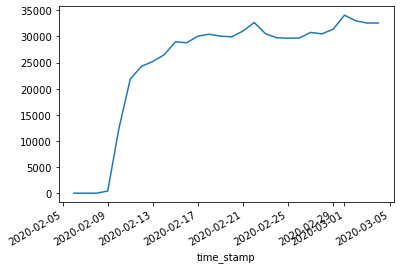

In [19]:
df.groupby('time_stamp')['user_id'].count().plot()

Посмотрим уникальность данных.

<AxesSubplot:xlabel='time_stamp'>

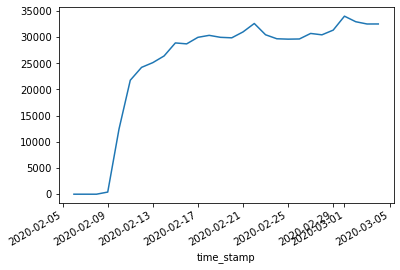

In [20]:
df.groupby('time_stamp')['user_id'].nunique().plot()

In [21]:
df.groupby('time_stamp')['user_id'].agg(['count','nunique'])

,count,nunique
time_stamp,,
2020-02-06,4,3
2020-02-08,1,1
2020-02-09,413,410
2020-02-10,12472,12445
2020-02-11,21822,21767
2020-02-12,24292,24225
2020-02-13,25194,25131
2020-02-14,26464,26407
2020-02-15,28959,28894


Данные почти не отличаются.

In [22]:
df['gold_on_event'].describe()

count     45412.000000
mean       1992.865322
std        3895.541280
min         500.000000
25%         500.000000
50%        1000.000000
75%        2400.000000
max      189600.000000
Name: gold_on_event, dtype: float64

Рассмотрим золото, потраченное на ивентный процесс.

<AxesSubplot:>

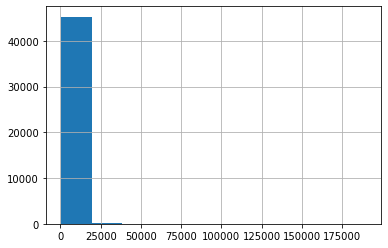

In [25]:
df['gold_on_event'].hist()

Рассмотрим золото, потраченное на другие активности.

<AxesSubplot:>

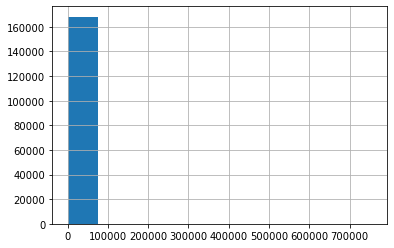

In [26]:
df['gold_on_other_activities'].hist()

In [27]:
df['gold_on_event_binar'] = (df['gold_on_event'] > 0)*1
df['gold_on_other_activities_binar'] = (df['gold_on_other_activities'] > 0)*1

Посчтаем конверсию.

In [32]:
(df.groupby(['AbGroup'])[['gold_on_event_binar','gold_on_event']].agg({'gold_on_event_binar':['count','mean'],
                                                                      'gold_on_event':['mean','median']}))

gold_on_event_binar          gold_on_event        
                      count     mean          mean  median
AbGroup                                                   
Control              558070  0.06523   1965.211658  1000.0
Test                 138770  0.06492   2104.606505  1500.0

Посмотрим попадают ли пользователи в контрольную и тестовую группу одновременно.

In [36]:
p = df.groupby('user_id')['AbGroup'].nunique().reset_index()

,user_id,AbGroup
0,00000d6d79ec151d74c5b0c0705d9d9fe252fe83,1
1,000133682d2dcd90c1a9c8ca5e34a294f31af64f,1
2,0001f13b0535b174bc7e36a1846c31c7a091c4b0,1
3,00021d57aced59fbfaf63ba620afada82fc06ca8,1
4,00027b7d34e10c17bfd4f76aa626403a2c5d1044,1
...,...,...
110955,fffea25b3877c861a4ebaa00e8fb9c5b96672e00,1
110956,fffeb6c54253ef0e7b0c4f38eb81a9dd9aebcb14,1
110957,ffff1964e1cb3bb0fc17c9ed440e3a6b6e6adf99,1
110958,ffff86c1dc72ba25d61ad8c92e9a5b3d6e2f5547,1


In [37]:
p[p['AbGroup'] > 1]

,user_id,AbGroup
202,007a61c7cc84aa559280c6d222aa3e15cb5e0114,2
208,007c891d5eb34c1398966a836d74a123452384de,2
895,02125379d8faf43debf755edfb32758ea5d789d8,2
1097,028e3fc09324ac6df71fccf432dabe44e476956c,2
1107,02977b73d35305fc135ea01bfcc9e1aa334d480a,2
...,...,...
110097,fe08c305b0317eecc6b5cf3cc5362fc912afdc0b,2
110362,fea60891a7ef95c7b95a0b1e58cb9d755684b3de,2
110480,fef449646b98d04def88b9ddb45e7c43bd9a278a,2
110515,ff079e7288b379b4e47650da302a5cc23e8c7ad3,2


In [48]:
p = (df.groupby(['AbGroup', 'user_id'])[['gold_on_event_binar','gold_on_event']].agg({'gold_on_event_binar':['count','mean'],
                                                                      'gold_on_event':['mean','median']})).reset_index()
p

AbGroup                                   user_id gold_on_event_binar  \
                                                                        count   
0       Control  00000d6d79ec151d74c5b0c0705d9d9fe252fe83                   2   
1       Control  000133682d2dcd90c1a9c8ca5e34a294f31af64f                  19   
2       Control  0001f13b0535b174bc7e36a1846c31c7a091c4b0                  11   
3       Control  00030f76fdb923292f29dfd06dd5a4ac6e5aaa7e                   1   
4       Control  00034f46e0922c7174676c439258e78aea4d6218                   6   
...         ...                                       ...                 ...   
111307     Test  ffe5439253fc51e41a4f9125e58a0f6df606b673                   1   
111308     Test  ffe93ceba3222628ac066df11bd5e3bb066d16a2                   1   
111309     Test  ffefccf748df1dc50e07511ec22c23471416f1cd                   7   
111310     Test  fff288cdc5e07b6b90564708970c35e2f32532c1                   1   
111311     Test  fff473d1df90105d6788351dcbed2cafbfb4757a                   4   

                 gold_on_event          
            mean          mean  median  
0       0.000000           NaN     NaN  
1       0.105263        1250.0  1250.0  
2       0.000000           NaN     NaN  
3       0.000000           NaN     NaN  
4       0.000000           NaN     NaN  
...          ...           ...     ...  
111307  0.000000           NaN     NaN  
111308  0.000000           NaN     NaN  
111309  0.000000           NaN     NaN  
111310  0.000000           NaN     NaN  
111311  0.000000           NaN     NaN  

[111312 rows x 6 columns]

Уберем двухэтажность индекса.

In [49]:
p.columns = ['_'.join(el) for el in p.columns.to_flat_index()]
p

,AbGroup_,user_id_,gold_on_event_binar_count,gold_on_event_binar_mean,gold_on_event_mean,gold_on_event_median
0,Control,00000d6d79ec151d74c5b0c0705d9d9fe252fe83,2,0.000000,NaN,NaN
1,Control,000133682d2dcd90c1a9c8ca5e34a294f31af64f,19,0.105263,1250.0,1250.0
2,Control,0001f13b0535b174bc7e36a1846c31c7a091c4b0,11,0.000000,NaN,NaN
3,Control,00030f76fdb923292f29dfd06dd5a4ac6e5aaa7e,1,0.000000,NaN,NaN
4,Control,00034f46e0922c7174676c439258e78aea4d6218,6,0.000000,NaN,NaN
...,...,...,...,...,...,...
111307,Test,ffe5439253fc51e41a4f9125e58a0f6df606b673,1,0.000000,NaN,NaN
111308,Test,ffe93ceba3222628ac066df11bd5e3bb066d16a2,1,0.000000,NaN,NaN
111309,Test,ffefccf748df1dc50e07511ec22c23471416f1cd,7,0.000000,NaN,NaN
111310,Test,fff288cdc5e07b6b90564708970c35e2f32532c1,1,0.000000,NaN,NaN


In [52]:
p.groupby('AbGroup_').agg(['count', 'mean'])

gold_on_event_binar_count           gold_on_event_binar_mean  \
                             count      mean                    count   
AbGroup_                                                                
Control                      89034  6.268055                    89034   
Test                         22278  6.229015                    22278   

                   gold_on_event_mean              gold_on_event_median  \
              mean              count         mean                count   
AbGroup_                                                                  
Control   0.031600              10685  2119.778819                10685   
Test      0.030891               2603  2417.938571                 2603   

                       
                 mean  
AbGroup_               
Control   2002.976135  
Test      2296.811371

Средний чек на человека 2119 в контрольной группе, 2417 в тестовой группе. В тестовой группе он немного вырос. Медиана тоже выросла.

Посчитаем p-val для медианы. Посчитаем вероятность того что выборки control и test не отличаются получить данные медианы

In [54]:
(df.groupby(['AbGroup'])[['gold_on_event_binar','gold_on_event']].agg({'gold_on_event_binar':['count','mean'],
                                                                      'gold_on_event':['mean','median']}))

gold_on_event_binar          gold_on_event        
                      count     mean          mean  median
AbGroup                                                   
Control              558070  0.06523   1965.211658  1000.0
Test                 138770  0.06492   2104.606505  1500.0

In [56]:
group_size = df['AbGroup'].value_counts().values
group_size

array([558070, 138770], dtype=int64)

In [57]:
from tqdm.notebook import tqdm

Посчитаем какова вероятность при тех же размерах выборки, но перемешанных данных, получить те же медианы. 

Bootstrap

In [63]:
df['gold_on_event_nona'] = df['gold_on_event'].fillna(0)

In [64]:
(df.groupby(['AbGroup'])[['gold_on_event_nona']].agg(['mean','median']))

gold_on_event_nona       
                      mean median
AbGroup                          
Control         128.191087    0.0
Test            136.631837    0.0

In [65]:
n = 1000
result = []
base_diff = 136.631837 - 128.191087

for _ in tqdm(range(n)):
  a = df.sample(group_size[0],replace=True)['gold_on_event_nona'].mean()
  b = df.sample(group_size[1],replace=True)['gold_on_event_nona'].mean()
  result.append(np.abs(a-b) >= base_diff)

In [67]:
np.mean(result)

0.016

1% то что эта разница получена случайно, 0.016 < 0.05, значит можем отклонить нулевую гепотезу 